In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import preprocess_input

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Preprocess the input data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)


In [4]:
base_model = ResNet152(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

234698864/234698864 [==============================] - 2s 0us/step


In [5]:
# Add some dense layers on top of the ResNet152 model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [6]:
# Define the model
model = Model(inputs=base_model.input, outputs=x)


In [7]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 43s 62ms/step - loss: 1.2415 - accuracy: 0.5998 - val_loss: 1.0377 - val_accuracy: 0.6357
Epoch 2/10
391/391 [==============================] - 21s 55ms/step - loss: 0.8910 - accuracy: 0.6844 - val_loss: 1.0071 - val_accuracy: 0.6561
Epoch 3/10
391/391 [==============================] - 21s 54ms/step - loss: 0.7576 - accuracy: 0.7302 - val_loss: 1.0030 - val_accuracy: 0.6644
Epoch 4/10
391/391 [==============================] - 19s 49ms/step - loss: 0.6403 - accuracy: 0.7690 - val_loss: 1.0688 - val_accuracy: 0.6565
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.5173 - accuracy: 0.8149 - val_loss: 1.1339 - val_accuracy: 0.6618
Epoch 6/10
391/391 [==============================] - 21s 54ms/step - loss: 0.4173 - accuracy: 0.8499 - val_loss: 1.2471 - val_accuracy: 0.6519
Epoch 7/10
391/391 [==============================] - 21s 55ms/step - loss: 0.3340 - accuracy: 0.8788 - val_loss: 1.4245 - val_accuracy:

In [10]:
# Fine-tune the model by unfreezing some of the top layers
for layer in model.layers[:141]:
    layer.trainable = False
for layer in model.layers[141:]:
    layer.trainable = True

In [12]:
# Compile the model again with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model again with a lower learning rate
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 54s 137ms/step - loss: 0.6150 - accuracy: 0.7822 - val_loss: 4.5410 - val_accuracy: 0.6131
Epoch 2/10
391/391 [==============================] - 50s 128ms/step - loss: 0.4622 - accuracy: 0.8385 - val_loss: 6.0931 - val_accuracy: 0.6265
Epoch 3/10
391/391 [==============================] - 50s 127ms/step - loss: 0.3432 - accuracy: 0.8839 - val_loss: 5.9402 - val_accuracy: 0.6363
Epoch 4/10
391/391 [==============================] - 49s 126ms/step - loss: 0.2636 - accuracy: 0.9134 - val_loss: 4.5944 - val_accuracy: 0.6455
Epoch 5/10
391/391 [==============================] - 49s 126ms/step - loss: 0.2034 - accuracy: 0.9361 - val_loss: 5.8742 - val_accuracy: 0.6501
Epoch 6/10
391/391 [==============================] - 51s 131ms/step - loss: 0.1639 - accuracy: 0.9519 - val_loss: 5.3884 - val_accuracy: 0.6575
Epoch 7/10
391/391 [==============================] - 52s 132ms/step - loss: 0.1391 - accuracy: 0.9586 - val_loss: 12.5707 - val_a

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 6.062779426574707
Test accuracy: 0.6736000180244446


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


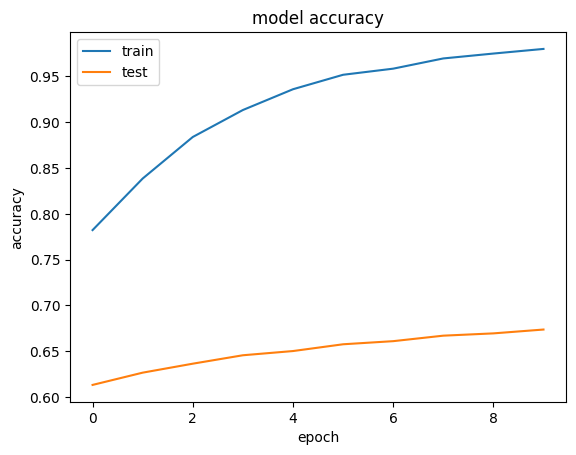

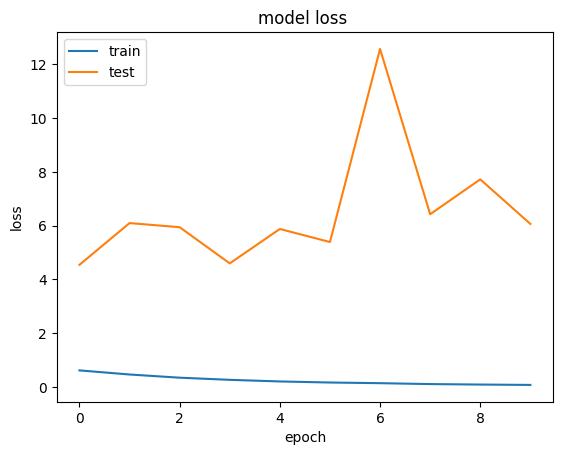

In [16]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Load the CIFAR-100 dataset
from tensorflow.keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [31]:
# Preprocess the input data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [32]:
base_model = ResNet152(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

In [33]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [34]:
# Add a global average pooling layer and a dense output layer
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='softmax')(x)

In [45]:
# Define the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

In [44]:
# Fine-tune the top layers
for layer in model.layers[-3:]:
    layer.trainable = True

In [46]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Train the model
history=model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 35s 64ms/step - loss: 0.1388 - accuracy: 0.9586 - val_loss: 6.9154 - val_accuracy: 0.3877
Epoch 2/10
391/391 [==============================] - 22s 55ms/step - loss: 0.0838 - accuracy: 0.9744 - val_loss: 6.8538 - val_accuracy: 0.3893
Epoch 3/10
391/391 [==============================] - 20s 51ms/step - loss: 0.0561 - accuracy: 0.9835 - val_loss: 6.8286 - val_accuracy: 0.3924
Epoch 4/10
391/391 [==============================] - 19s 50ms/step - loss: 0.0391 - accuracy: 0.9898 - val_loss: 6.8214 - val_accuracy: 0.3932
Epoch 5/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0279 - accuracy: 0.9937 - val_loss: 6.8238 - val_accuracy: 0.3939
Epoch 6/10
391/391 [==============================] - 22s 55ms/step - loss: 0.0205 - accuracy: 0.9964 - val_loss: 6.8309 - val_accuracy: 0.3943
Epoch 7/10
391/391 [==============================] - 22s 56ms/step - loss: 0.0155 - accuracy: 0.9976 - val_loss: 6.8437 - val_accuracy:

In [48]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 6.895117282867432
Test accuracy: 0.39730000495910645


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


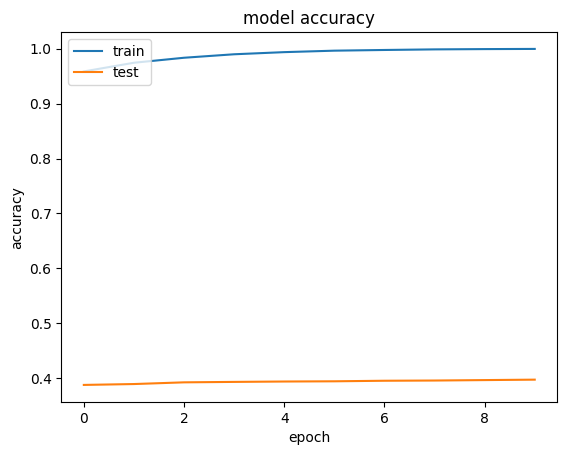

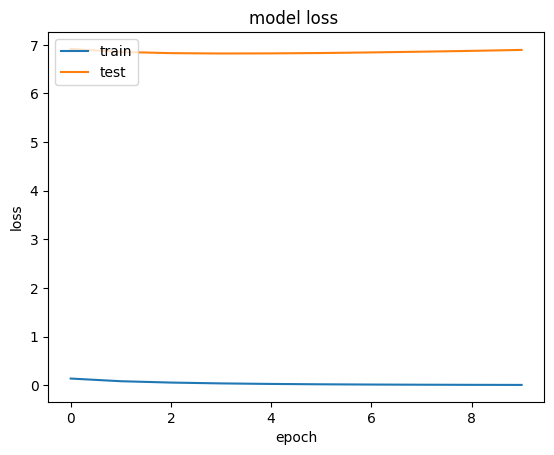

In [49]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()